In [ ]:
pip install stable-baselines3 pandas numpy

In [4]:
import numpy as np
import pandas as pd
import pytz
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import CheckpointCallback

# create env for training

In [7]:
from datetime import datetime, timedelta
from gym_mtsim import MtSimulator, OrderType, Timeframe, FOREX_DATA_PATH, MtEnv
sim = MtSimulator(
    unit='USD',
    balance=300.,
    leverage=100.,
    stop_out_level=0.2,
    hedge=True,
    symbols_filename=FOREX_DATA_PATH
)
print(FOREX_DATA_PATH)
if not sim.load_symbols("FOREX_DATA_PATH"):
    sim.download_data(
        symbols=['EURUSD', 'GBPUSD', 'USDJPY'],
        time_range=(
            datetime(2022, 10, 1, tzinfo=pytz.UTC),
            datetime(2022, 12, 31, tzinfo=pytz.UTC)
        ),
        timeframe=Timeframe.H4
    )
    sim.save_symbols(FOREX_DATA_PATH)

training_env = MtEnv(
    original_simulator=sim,
    trading_symbols=['GBPUSD', 'EURUSD', 'USDJPY'],
    window_size=10,
    hold_threshold=0.5,
    close_threshold=0.5,
    fee=lambda symbol: {
        'EURUSD': max(0., np.random.normal(0.0007, 0.00005)),
        'GBPUSD': max(0., np.random.normal(0.0002, 0.00003)),
        'USDJPY': max(0., np.random.normal(0.02, 0.003)),
    }[symbol],
    symbol_max_orders=2,
    multiprocessing_processes=2
)

# training_env = gym.make('forex-hedge-v0', env=training_env)

# training_env = gym.make('forex-hedge-v0')
# training_env = DummyVecEnv([lambda: training_env])

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\gym_mtsim\data\symbols_forex.pkl


# train model using stable-baseline3

In [21]:
model = A2C('MultiInputPolicy', training_env, verbose=1)
checkpoint_callback = CheckpointCallback(save_freq=10000, save_path='./A2C_checkpoints/')
model.learn(total_timesteps=50000, callback=checkpoint_callback)

# model.save("path/to/save/your/trained/model")
model.save("D:/graduate_project/Ravi_coding/PycharmProject_nodecsv/TEST-mt-SIM/A2C_models/A2C_55k")
# model= A2C.load("D:/graduate_project/Ravi_coding/PycharmProject_nodecsv/TEST-mt-SIM/PPO_models/A2C_55k")
# model = A2C.load("D:/graduate_project/Ravi_coding/PycharmProject_nodecsv/TEST-mt-SIM/models/A2C_test_200005")
# model = A2C.load("D:/graduate_project/Ravi_coding/PycharmProject_nodecsv/TEST-mt-SIM/checkpoints/rl_model_9502_steps.zip")
# model = A2C.load("path/to/load/your/trained/model")

# observation = training_env.reset()
# while True:
#     action, _states = model.predict(observation)
#     observation, reward, done, info = training_env.step(action)
#     if done:
#         break
print("FIN")        

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 374       |
|    ep_rew_mean        | -278      |
| time/                 |           |
|    fps                | 300       |
|    iterations         | 100       |
|    time_elapsed       | 1         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -17.1     |
|    explained_variance | -7.16e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 0.0358    |
|    std                | 1.01      |
|    value_loss         | 5.02e-06  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 374      |
|    ep_rew_mean        | -275     |
| time/                 |          |
|    fps                | 313      |


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 374      |
|    ep_rew_mean        | -257     |
| time/                 |          |
|    fps                | 324      |
|    iterations         | 1400     |
|    time_elapsed       | 21       |
|    total_timesteps    | 7000     |
| train/                |          |
|    entropy_loss       | -17.1    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | -0.0719  |
|    std                | 1.01     |
|    value_loss         | 1.79e-05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 374       |
|    ep_rew_mean        | -259      |
| time/                 |           |
|    fps                | 326       |
|    iterations         | 1500      |
|    time_elapsed       | 22        |
|    total_timesteps    | 7500

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 374      |
|    ep_rew_mean        | -235     |
| time/                 |          |
|    fps                | 334      |
|    iterations         | 2700     |
|    time_elapsed       | 40       |
|    total_timesteps    | 13500    |
| train/                |          |
|    entropy_loss       | -17.1    |
|    explained_variance | -0.00461 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2699     |
|    policy_loss        | -0.0116  |
|    std                | 1.01     |
|    value_loss         | 6.68e-07 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 374      |
|    ep_rew_mean        | -234     |
| time/                 |          |
|    fps                | 336      |
|    iterations         | 2800     |
|    time_elapsed       | 41       |
|    total_timesteps    | 14000    |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 374      |
|    ep_rew_mean        | -185     |
| time/                 |          |
|    fps                | 368      |
|    iterations         | 4000     |
|    time_elapsed       | 54       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -17.1    |
|    explained_variance | 0.000145 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3999     |
|    policy_loss        | -0.0191  |
|    std                | 1.01     |
|    value_loss         | 1.21e-06 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 374      |
|    ep_rew_mean        | -181     |
| time/                 |          |
|    fps                | 370      |
|    iterations         | 4100     |
|    time_elapsed       | 55       |
|    total_timesteps    | 20500    |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 374      |
|    ep_rew_mean        | -171     |
| time/                 |          |
|    fps                | 381      |
|    iterations         | 5300     |
|    time_elapsed       | 69       |
|    total_timesteps    | 26500    |
| train/                |          |
|    entropy_loss       | -16.9    |
|    explained_variance | 0.00708  |
|    learning_rate      | 0.0007   |
|    n_updates          | 5299     |
|    policy_loss        | -242     |
|    std                | 0.994    |
|    value_loss         | 2.64e+03 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 374      |
|    ep_rew_mean        | -172     |
| time/                 |          |
|    fps                | 382      |
|    iterations         | 5400     |
|    time_elapsed       | 70       |
|    total_timesteps    | 27000    |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 374       |
|    ep_rew_mean        | -144      |
| time/                 |           |
|    fps                | 390       |
|    iterations         | 6600      |
|    time_elapsed       | 84        |
|    total_timesteps    | 33000     |
| train/                |           |
|    entropy_loss       | -17.1     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6599      |
|    policy_loss        | 0.0486    |
|    std                | 1.01      |
|    value_loss         | 1e-05     |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 374      |
|    ep_rew_mean        | -143     |
| time/                 |          |
|    fps                | 390      |
|    iterations         | 6700     |
|    time_elapsed       | 85       |
|    total_timesteps

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 374      |
|    ep_rew_mean        | -117     |
| time/                 |          |
|    fps                | 385      |
|    iterations         | 7900     |
|    time_elapsed       | 102      |
|    total_timesteps    | 39500    |
| train/                |          |
|    entropy_loss       | -17      |
|    explained_variance | 0.0154   |
|    learning_rate      | 0.0007   |
|    n_updates          | 7899     |
|    policy_loss        | 231      |
|    std                | 1        |
|    value_loss         | 214      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 374      |
|    ep_rew_mean        | -103     |
| time/                 |          |
|    fps                | 384      |
|    iterations         | 8000     |
|    time_elapsed       | 104      |
|    total_timesteps    | 40000    |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 374      |
|    ep_rew_mean        | -96      |
| time/                 |          |
|    fps                | 381      |
|    iterations         | 9200     |
|    time_elapsed       | 120      |
|    total_timesteps    | 46000    |
| train/                |          |
|    entropy_loss       | -17.1    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9199     |
|    policy_loss        | 0.0316   |
|    std                | 1.01     |
|    value_loss         | 3.84e-06 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 374       |
|    ep_rew_mean        | -93.6     |
| time/                 |           |
|    fps                | 382       |
|    iterations         | 9300      |
|    time_elapsed       | 121       |
|    total_timesteps    | 4650

# Show the result of traning data

In [39]:
model= A2C.load("D:/graduate_project/Ravi_coding/PycharmProject_nodecsv/TEST-mt-SIM/A2C_models/A2C_55k")
print(model)
observation = training_env.reset()
while True:
    action, _states = model.predict(observation)
    observation, reward, done, info = training_env.step(action)
    if done:
        break
state = training_env.render()
# state = sim.get_state()
print(
    f"balance: {state['balance']}, equity: {state['equity']}, margin: {state['margin']}\n"
    f"free_margin: {state['free_margin']}, margin_level: {state['margin_level']}\n"
)
state['orders']

balance: 703.3970276581786, equity: 703.3970276581786, margin: 5.684341886080802e-14
free_margin: 703.3970276581786, margin_level: inf



,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Margin,Fee,Closed
0,30,GBPUSD,Buy,0.25,2022-12-27 16:00:00+00:00,1.20133,2022-12-27 20:00:00+00:00,1.20302,37.134215,300.3325,0.000205,True
1,29,GBPUSD,Buy,0.06,2022-12-21 04:00:00+00:00,1.21666,2022-12-21 08:00:00+00:00,1.21382,-18.264534,72.9996,0.000204,True
2,28,GBPUSD,Sell,0.34,2022-12-19 12:00:00+00:00,1.21656,2022-12-19 16:00:00+00:00,1.21807,-57.444041,413.6304,0.000180,True
3,27,EURUSD,Buy,0.37,2022-12-16 16:00:00+00:00,1.06051,2022-12-16 20:00:00+00:00,1.05895,-83.311913,392.3887,0.000692,True
4,26,EURUSD,Buy,0.25,2022-12-13 08:00:00+00:00,1.05432,2022-12-13 12:00:00+00:00,1.06463,240.625107,263.5800,0.000685,True
5,25,GBPUSD,Buy,0.20,2022-12-12 08:00:00+00:00,1.22738,2022-12-12 12:00:00+00:00,1.22929,33.648415,245.4760,0.000228,True
6,24,GBPUSD,Buy,0.30,2022-12-08 16:00:00+00:00,1.22333,2022-12-08 20:00:00+00:00,1.22364,2.949596,366.9990,0.000212,True
7,23,GBPUSD,Buy,0.32,2022-12-07 20:00:00+00:00,1.22095,2022-12-08 00:00:00+00:00,1.21842,-87.691806,390.7040,0.000210,True
8,22,EURUSD,Buy,0.19,2022-12-07 16:00:00+00:00,1.05181,2022-12-07 20:00:00+00:00,1.05058,-37.956049,199.8439,0.000768,True
9,21,GBPUSD,Sell,0.27,2022-12-07 16:00:00+00:00,1.22241,2022-12-07 20:00:00+00:00,1.22095,33.549563,330.0507,0.000217,True


# show the graph of trannig data

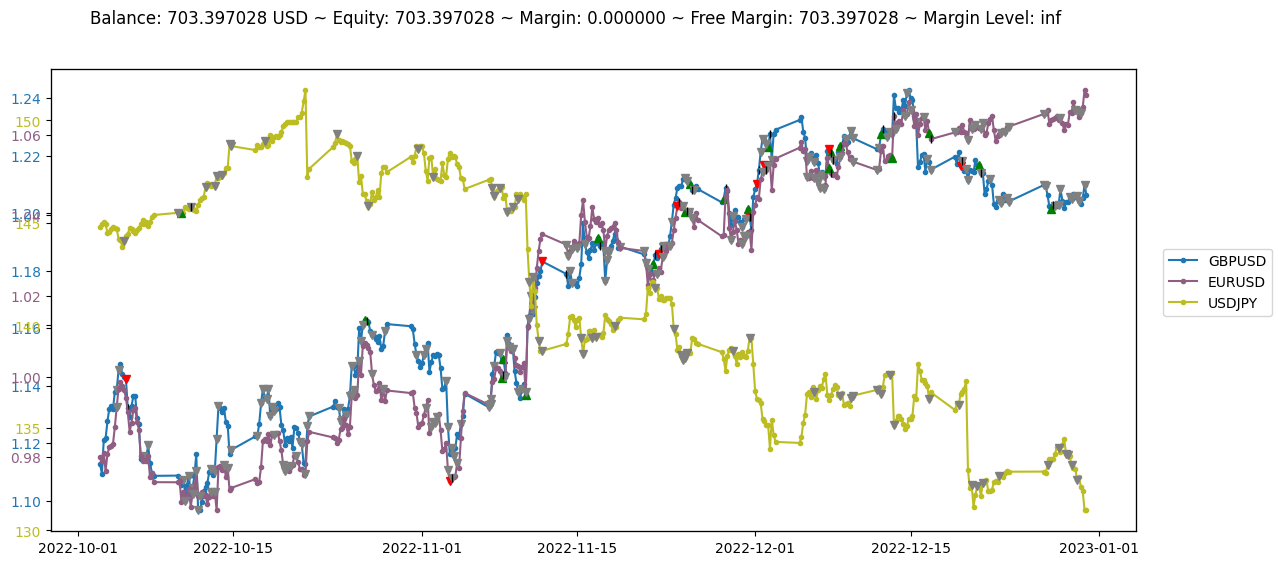

In [41]:
training_env.render('simple_figure')
training_env.render('advanced_figure', time_format="%Y-%m-%d")

# create env for testing

In [27]:
sim = MtSimulator(
    unit='USD',
    balance=300,
    leverage=100,
    stop_out_level=0.05,
#     margin_level=0.2,
    hedge=True,
    symbols_filename=FOREX_DATA_PATH,
#     equity=10
)
print(FOREX_DATA_PATH)
if not sim.load_symbols("FOREX_DATA_PATH"):
    sim.download_data(
        symbols=['EURUSD', 'GBPUSD', 'USDJPY'],
        time_range=(
            datetime(2023, 1, 1, tzinfo=pytz.UTC),
            datetime(2023, 1, 31, tzinfo=pytz.UTC)
        ),
        timeframe=Timeframe.H4
    )
    sim.save_symbols(FOREX_DATA_PATH)

testing_env = MtEnv(
#     equity=10,
    original_simulator=sim,
    trading_symbols=['GBPUSD', 'EURUSD', 'USDJPY'],
    window_size=10,
#     hold_threshold=0.5,
    hold_threshold=1,
    close_threshold=0.5,
    fee=lambda symbol: {
        'GBPUSD': max(0., np.random.normal(0.0007, 0.00005)),
        'EURUSD': max(0., np.random.normal(0.0002, 0.00003)),
        'USDJPY': max(0., np.random.normal(0.02, 0.003)),
    }[symbol],
    symbol_max_orders=2,
    multiprocessing_processes=2
)

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\gym_mtsim\data\symbols_forex.pkl


# LOAD model from tranning

In [34]:


model = A2C('MultiInputPolicy', testing_env, verbose=1)
model= A2C.load("D:/graduate_project/Ravi_coding/PycharmProject_nodecsv/TEST-mt-SIM/A2C_models/A2C_55k")
print(model)

observation_test = testing_env.reset()
while True:
    action, _states = model.predict(observation_test)
    observation_test, reward, done, info = testing_env.step(action)
    if done:
        break
state = testing_env.render()
# state = sim.get_state()
print(
    f"balance: {state['balance']}, equity: {state['equity']}, margin: {state['margin']}\n"
    f"free_margin: {state['free_margin']}, margin_level: {state['margin_level']}\n"
)

state['orders']        

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
balance: 347.54302543932647, equity: 327.26669783216175, margin: 228.54559999999998
free_margin: 98.72109783216177, margin_level: 1.431953613774064



,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Margin,Fee,Closed
0,20,GBPUSD,Sell,0.08,2023-01-31 20:00:00+00:00,1.23182,2023-02-01 00:00:00+00:00,1.23102,0.296343,98.5456,0.000763,False
1,18,USDJPY,Sell,0.13,2023-01-27 20:00:00+00:00,129.83100,2023-02-01 00:00:00+00:00,130.01800,-20.572671,130.0000,0.018755,False
2,19,GBPUSD,Sell,0.03,2023-01-30 16:00:00+00:00,1.23630,2023-01-30 20:00:00+00:00,1.23502,1.762187,37.0890,0.000693,True
3,17,EURUSD,Buy,0.23,2023-01-26 16:00:00+00:00,1.08648,2023-01-26 20:00:00+00:00,1.08912,56.220133,249.8904,0.000196,True
4,16,GBPUSD,Buy,0.09,2023-01-25 16:00:00+00:00,1.23820,2023-01-25 20:00:00+00:00,1.24006,9.369903,111.4380,0.000819,True
5,15,GBPUSD,Buy,0.10,2023-01-25 12:00:00+00:00,1.23153,2023-01-25 16:00:00+00:00,1.23820,59.399797,123.1530,0.000730,True
6,14,USDJPY,Buy,0.03,2023-01-24 04:00:00+00:00,130.14100,2023-01-25 00:00:00+00:00,130.26800,2.537536,30.0000,0.016813,True
7,13,GBPUSD,Buy,0.04,2023-01-23 12:00:00+00:00,1.23457,2023-01-23 16:00:00+00:00,1.23687,6.427261,49.3828,0.000693,True
8,12,GBPUSD,Buy,0.01,2023-01-18 00:00:00+00:00,1.22845,2023-01-18 04:00:00+00:00,1.22821,-0.976998,12.2845,0.000737,True
9,11,EURUSD,Sell,0.11,2023-01-17 20:00:00+00:00,1.07880,2023-01-18 00:00:00+00:00,1.07962,-11.182564,118.6680,0.000197,True


# show result from tranning

C:\Python310\lib\site-packages\matplotlib\axis.py:125: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



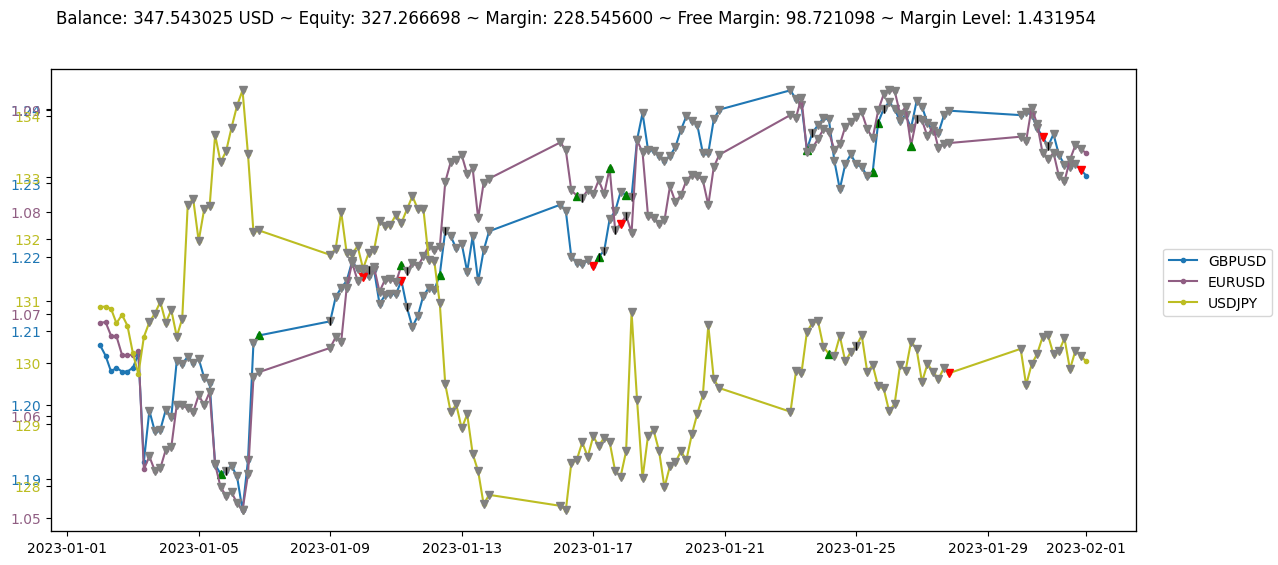

In [35]:
testing_env.render('simple_figure')
testing_env.render('advanced_figure', time_format="%Y-%m-%d")